In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
#imputer to handle missing data 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
# handle categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#regression librarry
from sklearn.tree import DecisionTreeRegressor
#o check accuracy
from sklearn.metrics import accuracy_score
# to check accuracy
from sklearn.metrics import *

import pickle 
import os, sys
import csv

# ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
# load dataset
dataset_original = pd.read_csv ("Position_Salaries.csv")
dataset = dataset_original
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 10 rows and 3 Columns


In [4]:
dataset.sample()

,Position,Level,Salary
5,Region Manager,6,150000


In [5]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


In [7]:
# handling missing data if nessesary

dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [8]:
# check for minimum dataset
dataset.min()

Position    Business Analyst
Level                      1
Salary                 45000
dtype: object

In [9]:
# # Handle Missing data
# def handle_min_values(dataset):
#     # replace min values by mean
#     dataset.replace(0, dataset.mean(), inplace=True)
#     return dataset

# dataset = handle_min_values(dataset)

In [10]:
# #check dataset replace with mean or not
# dataset.min()

In [11]:
# # seperate fetures and label
# x_data = dataset.iloc[:, :-1].values
# y_data = dataset.iloc[:, 1].values

In [12]:
# # handle categorical data
# def handle_categorical_data(x_data):
#     #encode categorical data
#     label_encod = LabelEncoder()
#     x_data[:, 1] = label_encod.fit_transform(x_data[:, 1])
    
#     # one hot encoding
#     onehotencode = OneHotEncoder(categorical_features= [1])
#     x_data = onehotencode.fit_transform(x_data).toarray()
    
#     return x_data
    
# x_data = handle_categorical_data(x_data)

In [13]:
# #convert numpy.ndarray to DataFrame
# x_data = pd.DataFrame(x_data)
# x_data.shape

In [14]:
# create directory to store csv files
os.mkdir("CSV_files")

In [15]:
# split dataset 

def splitdata(dataset):
    # split train and test data
    train, test = train_test_split(dataset,test_size = 0.20, random_state=0)
    print("train : ", train.shape, " test : ", test.shape)

    # saving datasets into csv files
    test.to_csv('CSV_files/test_file.csv',index=False,encoding='utf-8')

    # divide train data into train and cross validation 
    train_data, crossV_data = train_test_split(train,test_size = 0.30,random_state=0)
    
     #load data into csv for train and cross validation
    train_data.to_csv('CSV_files/train_file.csv',index=False,encoding='utf-8')
    crossV_data.to_csv('CSV_files/CValidation_file.csv',index=False,encoding='utf-8')
    
    print("train_data : ", train_data.shape, " crossV_data : ", crossV_data.shape)

splitdata(dataset)

train :  (8, 3)  test :  (2, 3)
train_data :  (5, 3)  crossV_data :  (3, 3)


In [16]:
# load dataset
train_dataset = pd.read_csv ("CSV_files/train_file.csv")
print("Dataset has {} rows and {} Columns".format(train_dataset.shape[0],train_dataset.shape[1])) 

Dataset has 5 rows and 3 Columns


In [17]:
train_dataset.head()

,Position,Level,Salary
0,Region Manager,6,150000
1,Partner,7,200000
2,Country Manager,5,110000
3,Manager,4,80000
4,Senior Partner,8,300000



 Accuracy train by acc_r2 100.0

 Accuracy train by mean_ab 100.0

 Accuracy train by mean_sq 0.0

 Accuracy train by mean_sq_log 0.0

 Accuracy train by median_ab_error 0.0


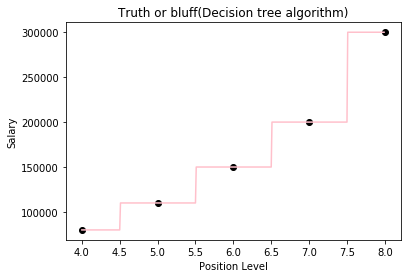


Pikle file created


In [22]:
class DecisionTreeReg():
    
    def create_module(self,x_train,y_train):
        
        # fitting simple LR to the training set
        regression = DecisionTreeRegressor(random_state=0)
    
        regression.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
        
        return regression
    
            
        
    
    def y_prediction(self,x_train,regression):
        # predicting the test set result
        y_predict = regression.predict(x_train)
        
        return y_predict
    
    def accuracy(self,y_predict_train,y_train):
        # accuracy using r2 score
        acc_r2 = r2_score(y_train, y_predict_train)*100      
#         acc_r2 = (1-error)*100
  
        total_error = mean_absolute_error(y_train, y_predict_train)
        mean_ab=( 1- (total_error / len(y_train))) *100
        
        mean_sq  = mean_squared_error(y_train, y_predict_train) 

        mean_sq_log = mean_squared_log_error(y_train, y_predict_train)  
    
        median_ab_error = median_absolute_error(y_train, y_predict_train)
        
        return acc_r2,mean_ab,mean_sq,mean_sq_log, median_ab_error
    

    
    def visualization(self,x_train,y_train,regression):
        
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
        
        x_grid = np.arange(min(x_train), max(x_train), 0.01)
        x_grid = x_grid.reshape((len(x_grid),1))
        
        plt.scatter(x_train,y_train, color = 'black')

        plt.plot(x_grid,regression.predict(x_grid.reshape(-1,1)), color = 'pink')
        plt.title("Truth or bluff(Decision tree algorithm)")
        plt.xlabel("Position Level")
        plt.ylabel("Salary")
        plt.show()
        
    def create_piklefile(self,regression):
        # dump train model pickle file
        file = open('DecisionTreeModule.pkl', 'wb')
        pickle.dump(regression,file)
        file.close() 
        

def main():
   
    obj  = DecisionTreeReg()    
    
    x_train = train_dataset.iloc[:,1:2].values
    y_train = train_dataset.iloc[:,2].values  
    
    regression = obj.create_module(x_train,y_train)
           
    y_train_pre = obj.y_prediction(x_train,regression)
    
    acc_r2,mean_ab,mean_sq,mean_sq_log, median_ab_error = obj.accuracy(y_train_pre,y_train)
    print("\n Accuracy train by acc_r2", acc_r2)
    print("\n Accuracy train by mean_ab", mean_ab)
    print("\n Accuracy train by mean_sq", mean_sq)
    print("\n Accuracy train by mean_sq_log", mean_sq_log)
    print("\n Accuracy train by median_ab_error", median_ab_error)
    
    
    
    obj.visualization(x_train,y_train, regression)
    
    obj.create_piklefile(regression)
    print("\nPikle file created")

if __name__ == '__main__':
    main()
